# Crime Dataset 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\SOMNATH\Downloads\archive (1)\crime_dataset_india.csv")

# Displaying basic information 

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB
None


In [33]:
df.head()


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [51]:
# Convert date columns to datetime format
df["Date Reported"] = pd.to_datetime(df["Date Reported"], errors='coerce')
df["Date of Occurrence"] = pd.to_datetime(df["Date of Occurrence"], errors='coerce')
df["Date Case Closed"] = pd.to_datetime(df["Date Case Closed"], errors='coerce', dayfirst=True)
# Extract Year and Month for trend analysis
df["Year"] = df["Date of Occurrence"].dt.year
df["Month"] = df["Date of Occurrence"].dt.month

# Yearly crime trend Analysis

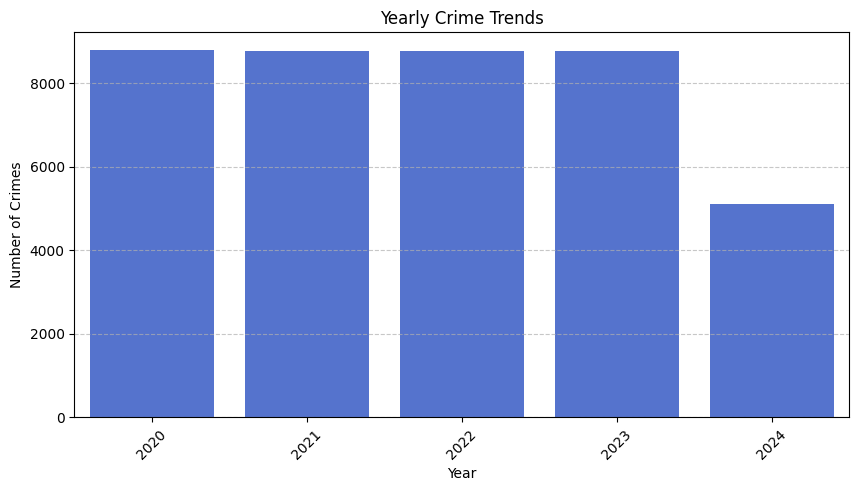

In [52]:
# Crime Trend Analysis (Yearly)
crime_trends_yearly = df["Year"].value_counts().sort_index()

# Plot yearly crime trends
plt.figure(figsize=(10, 5))
sns.barplot(x=crime_trends_yearly.index, y=crime_trends_yearly.values, color="royalblue")
plt.title("Yearly Crime Trends")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines for better visibility
plt.show()


# Monthly crime trend Analysis

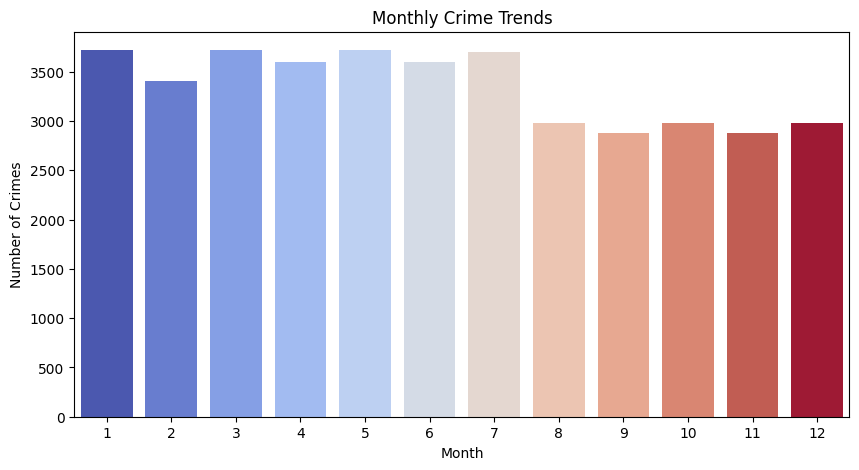

In [53]:
# Crime Trend Analysis (Monthly)
crime_trends_monthly = df["Month"].value_counts().sort_index()

# Plot monthly crime trends
plt.figure(figsize=(10,5))
sns.barplot(x=crime_trends_monthly.index, y=crime_trends_monthly.values, hue=crime_trends_monthly.index, palette='coolwarm', legend=False)
plt.title("Monthly Crime Trends")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()

# Most common types of crimes

In [54]:
# Get the counts of different types of crime
crime_type = df['Crime Description'].value_counts()

# Print the top 10 cities
print("Counts of different types of crime:")
print(crime_type)

Counts of different types of crime:
Crime Description
BURGLARY               1980
VANDALISM              1975
FRAUD                  1965
DOMESTIC VIOLENCE      1932
FIREARM OFFENSE        1931
ROBBERY                1928
KIDNAPPING             1920
IDENTITY THEFT         1918
SEXUAL ASSAULT         1917
ASSAULT                1915
TRAFFIC VIOLATION      1915
PUBLIC INTOXICATION    1912
HOMICIDE               1909
CYBERCRIME             1899
ILLEGAL POSSESSION     1895
ARSON                  1894
DRUG OFFENSE           1890
EXTORTION              1873
COUNTERFEITING         1871
VEHICLE - STOLEN       1862
SHOPLIFTING            1859
Name: count, dtype: int64


# Distribution of different types of crimes

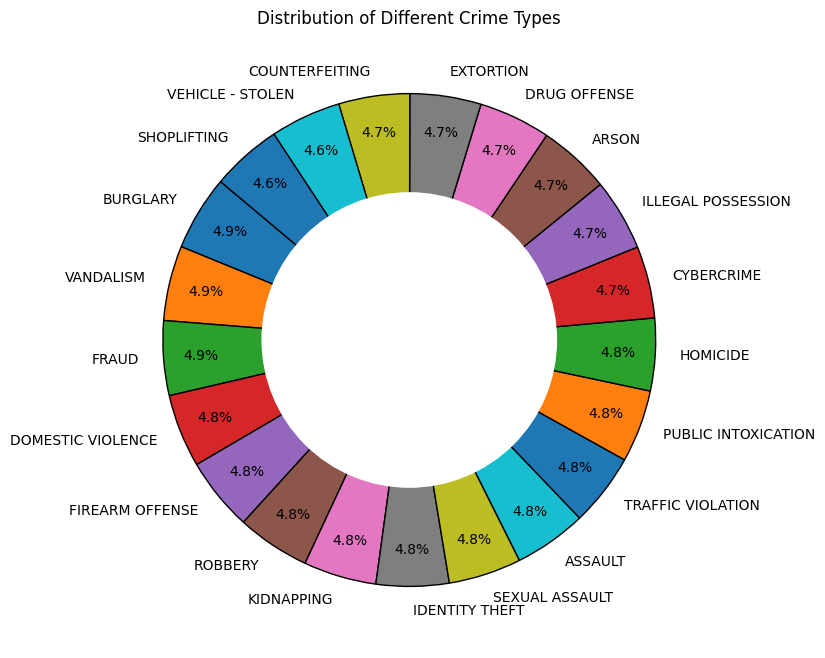

In [55]:
# Count occurrences of each crime type
crime_type_distribution = df['Crime Description'].value_counts().reset_index()
crime_type_distribution.columns = ['Crime Type', 'Count']

# Set figure size
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(crime_type_distribution['Count'], labels=crime_type_distribution['Crime Type'], 
        autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)

# Add a title
plt.title("Distribution of Different Crime Types")

# Draw a circle in the center to create a "donut chart" effect (similar to Plotly's hole=0.4)
centre_circle = plt.Circle((0,0), 0.60, fc='white')
plt.gca().add_patch(centre_circle)

# Show the chart
plt.show()

# The top 10 most reported crimes

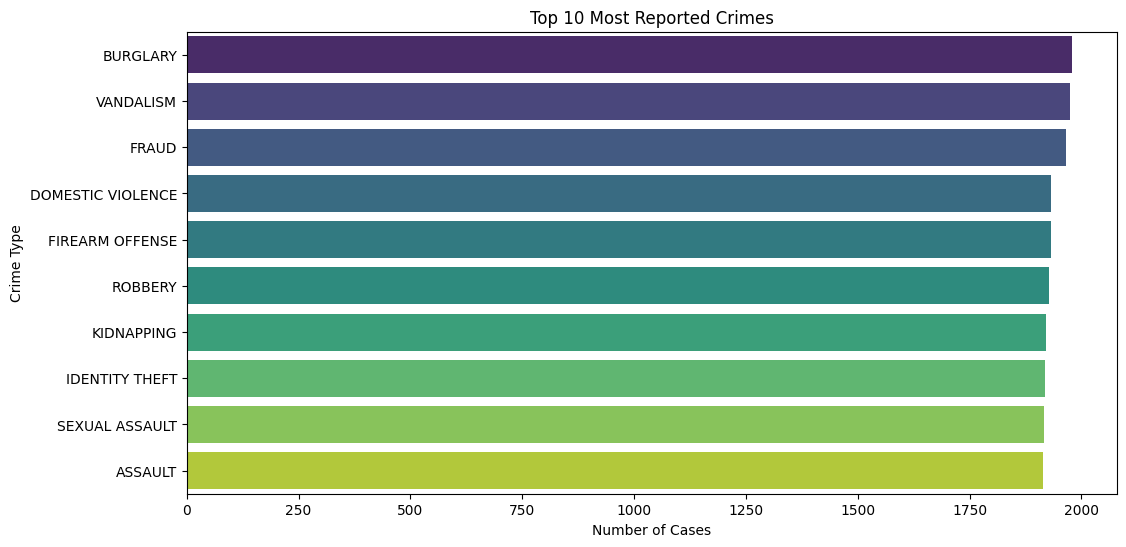

In [56]:
# Top 10 Crimes Analysis
top_crimes = df["Crime Description"].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(y=top_crimes.index, x=top_crimes.values, hue=top_crimes.index, palette='viridis', legend=False)
plt.title("Top 10 Most Reported Crimes")
plt.xlabel("Number of Cases")
plt.ylabel("Crime Type")
plt.show()

# Distribution of crimes across the city


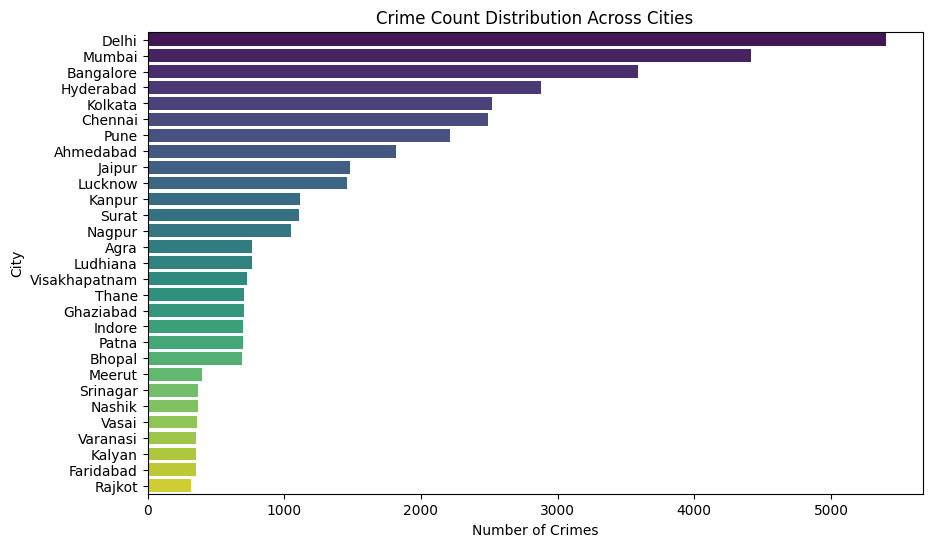

In [57]:
# Count crimes per city and create a DataFrame
crime_city_count = df['City'].value_counts().reset_index()
crime_city_count.columns = ['City', 'Crime Count']

# Set figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot with hue
sns.barplot(y=crime_city_count['City'], x=crime_city_count['Crime Count'], hue=crime_city_count['City'], 
            palette="viridis", legend=False)

# Add labels and title
plt.xlabel("Number of Crimes")
plt.ylabel("City")
plt.title("Crime Count Distribution Across Cities")

# Show the plot
plt.show()


# The top 10 cities with the highest crime counts

In [58]:
# Get the top 10 cities with the highest crime counts
top_cities = df['City'].value_counts().head(10)

# Print the top 10 cities
print("Top 10 Cities with Highest Crime Counts:")
print(top_cities)

Top 10 Cities with Highest Crime Counts:
City
Delhi        5400
Mumbai       4415
Bangalore    3588
Hyderabad    2881
Kolkata      2518
Chennai      2493
Pune         2212
Ahmedabad    1817
Jaipur       1479
Lucknow      1456
Name: count, dtype: int64


# Identify and compare the crime counts in the top 10 cities using a bar chart.

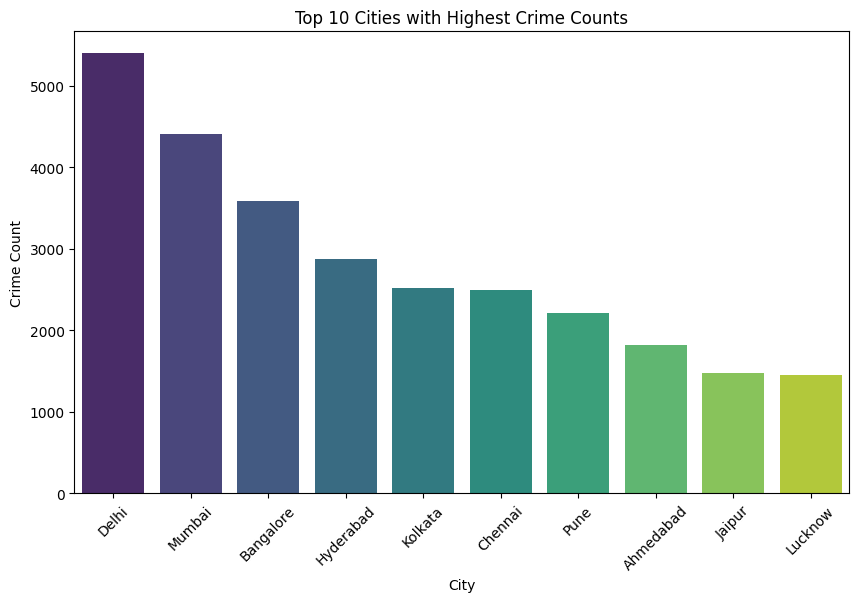

In [59]:
# Convert to DataFrame for plotting
top_cities_plot = top_cities.reset_index()
top_cities_plot.columns = ['City', 'Crime Count']

# Set figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn with hue to avoid the warning
sns.barplot(x=top_cities_plot['City'], y=top_cities_plot['Crime Count'], 
            hue=top_cities_plot['City'], palette="viridis", legend=False)

# Add labels and title
plt.xlabel("City")
plt.ylabel("Crime Count")
plt.title("Top 10 Cities with Highest Crime Counts")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

# Crime victims distributed across different genders

In [60]:
# Get the counts of victims gender 
top_cities = df['Victim Gender'].value_counts().head(10)

# Print the top 10 cities
print("counts of victims gender:")
print(top_cities)


counts of victims gender:
Victim Gender
F    22423
M    13405
X     4332
Name: count, dtype: int64


# Percentage of crime victims belong to each gender category

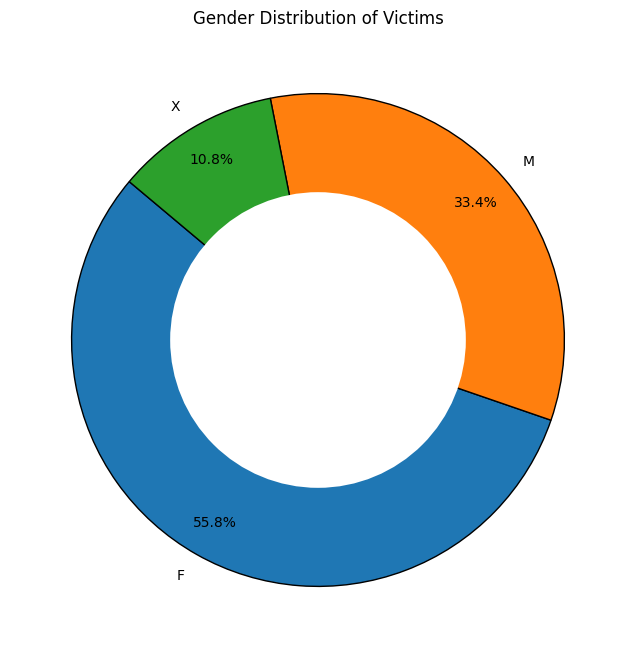

In [61]:
# Count occurrences of each gender
gender_distribution = df['Victim Gender'].value_counts().reset_index()
gender_distribution.columns = ['Gender', 'Count']

# Set figure size
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(gender_distribution['Count'], labels=gender_distribution['Gender'], 
        autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)

# Add a title
plt.title("Gender Distribution of Victims")

# Draw a circle in the center to create a "donut chart" effect
centre_circle = plt.Circle((0,0), 0.60, fc='white')
plt.gca().add_patch(centre_circle)

# Show the chart
plt.show()


# Weapons are most commonly used in different types of crimes

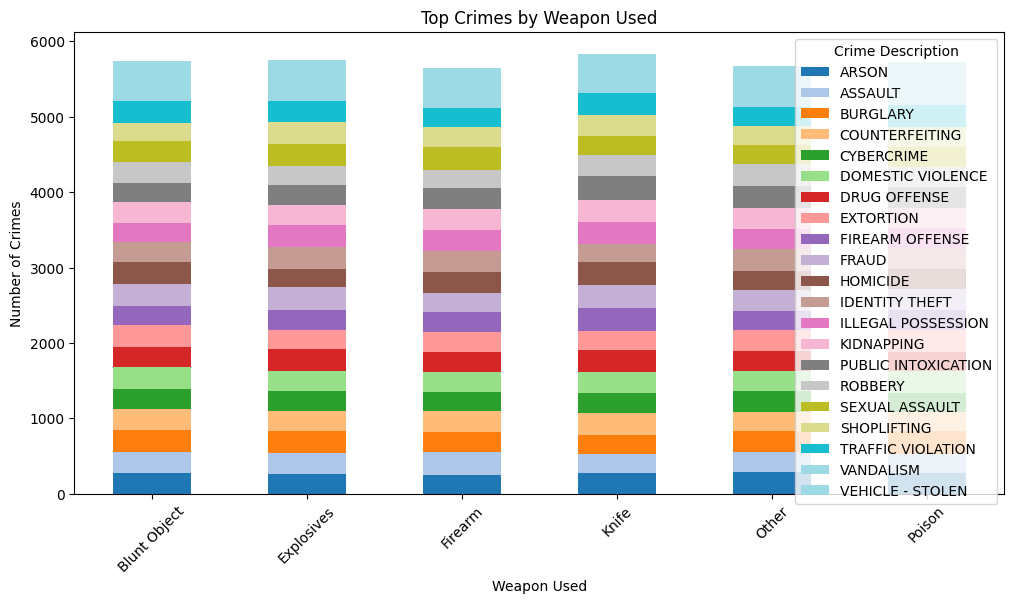

In [62]:

# Group and count occurrences of each crime description per weapon used
crime_counts = df.groupby(['Weapon Used', 'Crime Description']).size().reset_index(name='Count')

# Pivot the data for stacking
stacked_data = crime_counts.pivot(index="Weapon Used", columns="Crime Description", values="Count").fillna(0)

# Plot stacked bars
stacked_data.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")

# Labels and title
plt.xlabel("Weapon Used")
plt.ylabel("Number of Crimes")
plt.title("Top Crimes by Weapon Used")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.legend(title="Crime Description")
plt.show()

# Different crime domains vary across cities

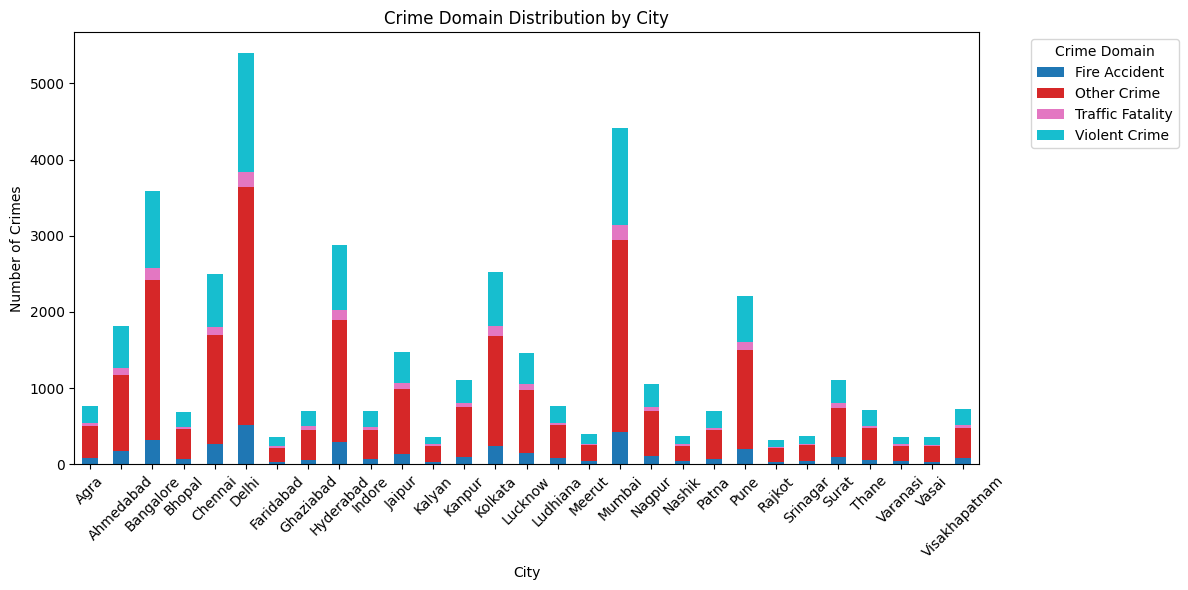

In [63]:
# Group and pivot the data to prepare for stacking
crime_domain_by_city = df.groupby(['City', 'Crime Domain']).size().reset_index(name='Count')
stacked_data = crime_domain_by_city.pivot(index="City", columns="Crime Domain", values="Count").fillna(0)

# Plot stacked bars
stacked_data.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")

# Labels and title
plt.xlabel("City")
plt.ylabel("Number of Crimes")
plt.title("Crime Domain Distribution by City")
plt.legend(title="Crime Domain", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# No. of crimes from each domain are reported in different cities

In [64]:
# Group data by City and Crime Domain and count occurrences
crime_domain_by_city = df.groupby(['City', 'Crime Domain']).size().reset_index(name='Count')

# Print the count data
print(crime_domain_by_city)


              City      Crime Domain  Count
0             Agra     Fire Accident     83
1             Agra       Other Crime    420
2             Agra  Traffic Fatality     33
3             Agra     Violent Crime    228
4        Ahmedabad     Fire Accident    168
..             ...               ...    ...
111          Vasai     Violent Crime    105
112  Visakhapatnam     Fire Accident     79
113  Visakhapatnam       Other Crime    397
114  Visakhapatnam  Traffic Fatality     45
115  Visakhapatnam     Violent Crime    207

[116 rows x 3 columns]


# Crime domains that have the most prolonged investigations

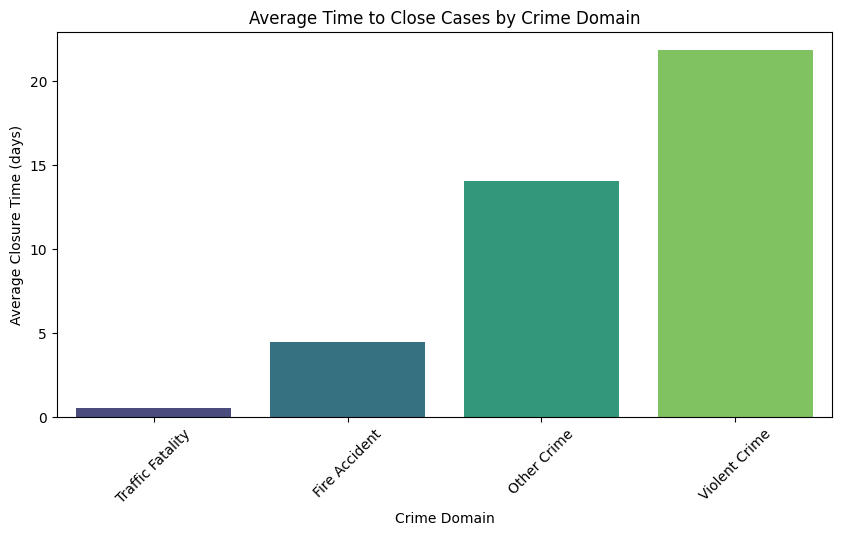

In [65]:
df['Case Closure Duration (days)'] = (df['Date Case Closed'] - df['Date Reported']).dt.days
df['Case Closure Duration (days)'] = df['Case Closure Duration (days)'].fillna(-1)  # -1 means case is still open

# Plot the bar chart using Matplotlib
plt.figure(figsize=(10, 5))
sns.barplot(x=closure_time_by_domain.index, 
            y=closure_time_by_domain.values, 
            hue=closure_time_by_domain.index, 
            palette="viridis", 
            legend=False)  # Hide the redundant legend



# Labels and title
plt.xlabel("Crime Domain")
plt.ylabel("Average Closure Time (days)")
plt.title("Average Time to Close Cases by Crime Domain")
plt.xticks(rotation=45)  # Rotate labels for readability

# Show the plot
plt.show()

# The average time taken to close cases for different crime domains


In [66]:
df['Case Closure Duration (days)'] = df['Case Closure Duration (days)'].fillna(-1)  # -1 means case is still open

#Compute the average closure time for each crime domain
closure_time_by_domain = df.groupby('Crime Domain')['Case Closure Duration (days)'].mean().sort_values()

# Print the data
print("\nAverage Time to Close Cases by Crime Domain (days):")
print(closure_time_by_domain)




Average Time to Close Cases by Crime Domain (days):
Crime Domain
Traffic Fatality     0.503394
Fire Accident        4.426928
Other Crime         14.023880
Violent Crime       21.849024
Name: Case Closure Duration (days), dtype: float64
